# 数据可视化作业题目

In [109]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [60]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


/tmp/ipykernel_427253/574591536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_month = data.drop(columns="year").groupby("month").agg("sum")


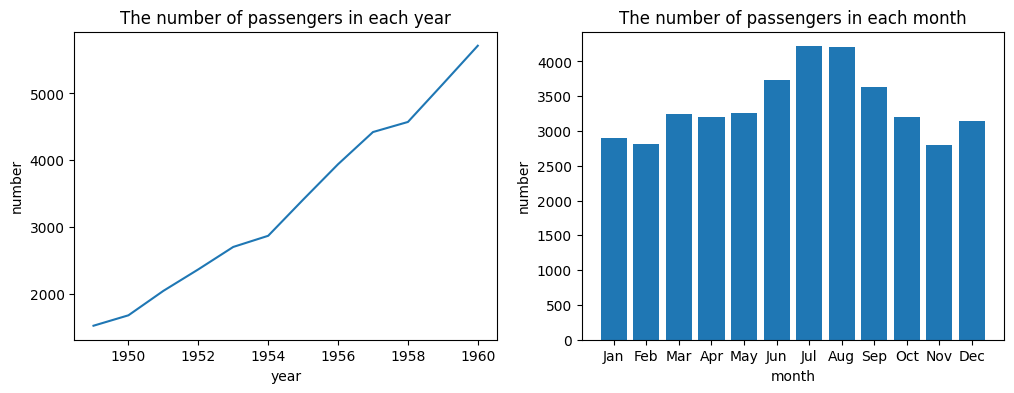

In [62]:

data_year = data.drop(columns="month").groupby("year").agg("sum")  #去掉月份，按年份排序，并且对后面的值求和
data_month = data.drop(columns="year").groupby("month").agg("sum")


#作图
fig, ax = plt.subplots(1, 2, figsize=(12,4)) #作出一个一行两列的子图, fig是返回的对象，ax是子图
ax[0].plot(data_year.index, data_year.values) #折线图
ax[0].set_xlabel("year")
ax[0].set_ylabel("number")
ax[0].set_title("The number of passengers in each year")

ax[1].bar(data_month.index, data_month.values.reshape(1,-1)[0])#柱状图
ax[1].set_xlabel("month")
ax[1].set_ylabel("number")
ax[1].set_title("The number of passengers in each month")
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [63]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


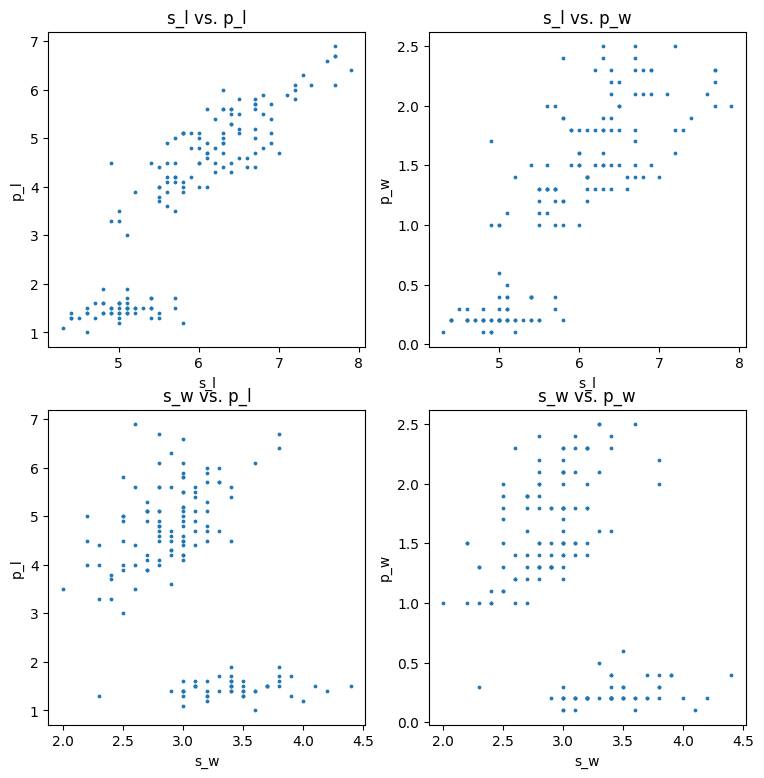

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(9,9)) #画出4个子图
ax[0][0].scatter(data["sepal_length"], data["petal_length"], s=3)
ax[0][0].set_xlabel("s_l")
ax[0][0].set_ylabel("p_l")
ax[0][0].set_title("s_l vs. p_l")
ax[0][1].scatter(data["sepal_length"], data["petal_width"], s=3)
ax[0][1].set_xlabel("s_l")
ax[0][1].set_ylabel("p_w")
ax[0][1].set_title("s_l vs. p_w")
ax[1][0].scatter(data["sepal_width"], data["petal_length"], s=3)
ax[1][0].set_xlabel("s_w")
ax[1][0].set_ylabel("p_l")
ax[1][0].set_title("s_w vs. p_l")
ax[1][1].scatter(data["sepal_width"], data["petal_width"], s=3)
ax[1][1].set_xlabel("s_w")
ax[1][1].set_ylabel("p_w")
ax[1][1].set_title("s_w vs. p_w")
plt.show()

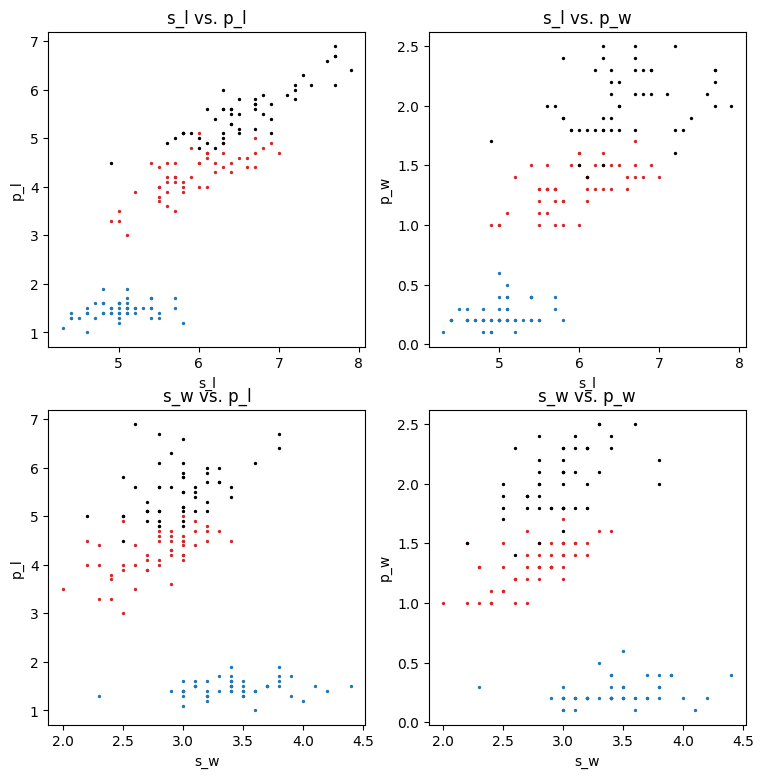

In [67]:
data_species = data.groupby("species")  #按照种类分类
group_name_list = ["setosa", "versicolor", "virginica"]
color_list = ["tab:blue", "tab:red", "black"]  #定义三种颜色，tab集合中的blue和red

fig, ax = plt.subplots(2, 2, figsize=(9,9))  
for group_name, color in zip(group_name_list, color_list): #zip打包成一个元组序列，逐一配对
    data_species_ = data_species.get_group(group_name)
    ax[0][0].scatter(data_species_["sepal_length"], data_species_["petal_length"], s=2, c=color)
    ax[0][1].scatter(data_species_["sepal_length"], data_species_["petal_width"], s=2, c=color)
    ax[1][0].scatter(data_species_["sepal_width"], data_species_["petal_length"], s=2, c=color)
    ax[1][1].scatter(data_species_["sepal_width"], data_species_["petal_width"], s=2, c=color)
ax[0][0].set_xlabel("s_l")
ax[0][0].set_ylabel("p_l")
ax[0][0].set_title("s_l vs. p_l")
ax[0][1].set_xlabel("s_l")
ax[0][1].set_ylabel("p_w")
ax[0][1].set_title("s_l vs. p_w")
ax[1][0].set_xlabel("s_w")
ax[1][0].set_ylabel("p_l")
ax[1][0].set_title("s_w vs. p_l")
ax[1][1].set_xlabel("s_w")
ax[1][1].set_ylabel("p_w")
ax[1][1].set_title("s_w vs. p_w")
plt.show()

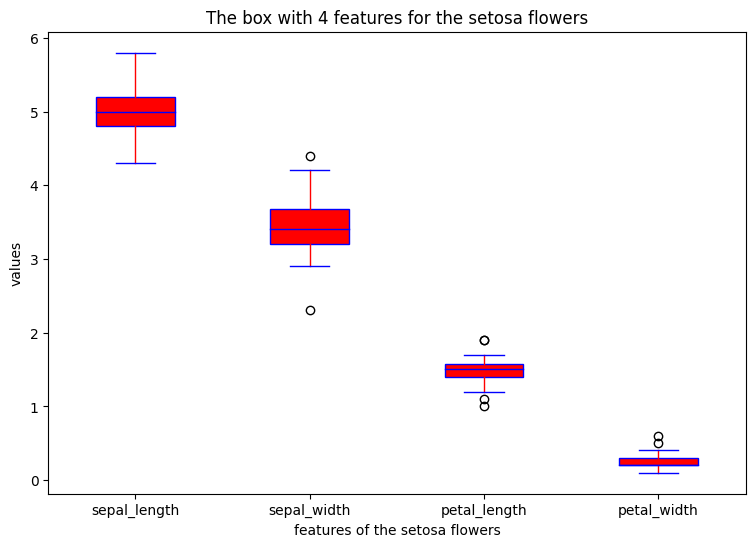

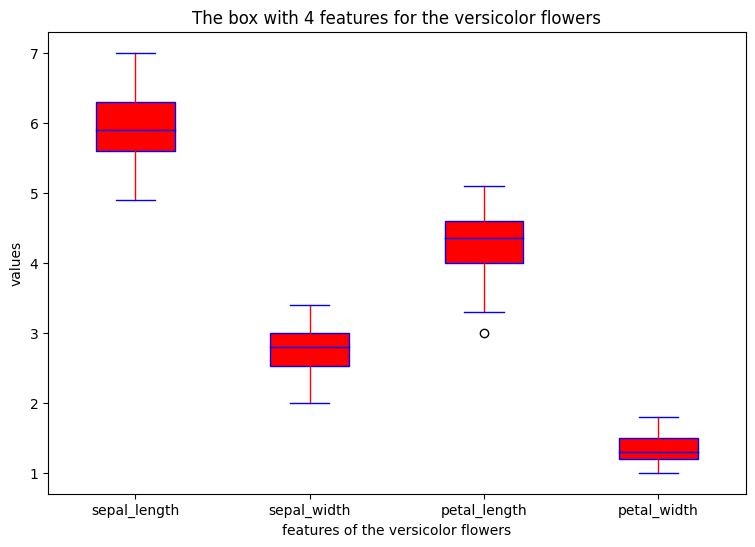

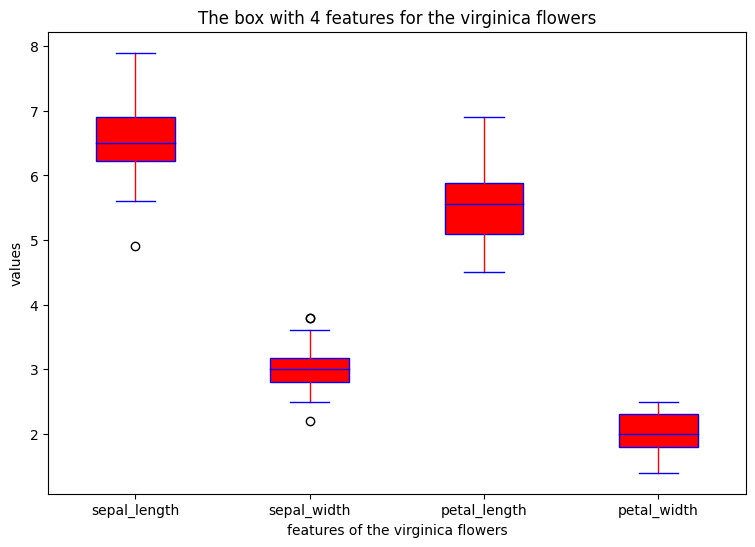

In [82]:
varible_name_list = ["sepal_length", "sepal_width", "petal_length", "petal_width"] #定义横坐标

for group_name in group_name_list: #循环作出三张图
    fig, ax = plt.subplots(figsize=(9,6))
    data_species_ = data_species.get_group(group_name)#从之前分类的表中，取出其中一种种类
    #作出箱式图形
    ax.boxplot(data_species_.drop(columns="species"), patch_artist = True,
               medianprops = {'color': 'b'},
               boxprops = {'color': 'b', 'facecolor': 'r'},
               whiskerprops = {'color': 'r'},
               capprops = {'color': 'b'}
               )
    ax.set_xlabel(f"features of the {group_name} flowers")
    ax.set_xticks([1,2,3,4], labels=varible_name_list) #标出x的刻度和其相应的值
    ax.set_ylabel("values")
    ax.set_title(f"The box with 4 features for the {group_name} flowers")
    plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [83]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


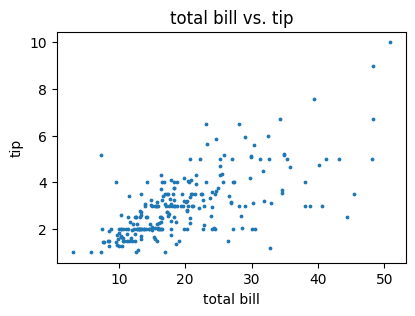

In [94]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.scatter(data["total_bill"], data["tip"], s=3,c="tab:blue")
ax.set_xlabel("total bill")
ax.set_ylabel("tip")
ax.set_title("total bill vs. tip")
plt.show()

/tmp/ipykernel_427253/1828015138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_sex = data.groupby("sex")


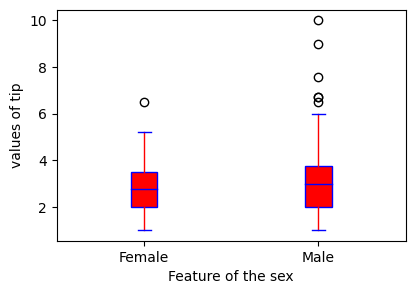

In [95]:
data_sex = data.groupby("sex")    #按照性别分成两组
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_sex.get_group("Female")["tip"], data_sex.get_group("Male")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the sex")
ax.set_xticks([1,2], labels=["Female", "Male"])
ax.set_ylabel("values of tip")
plt.show()

/tmp/ipykernel_427253/2421229174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_smoke = data.groupby("smoker")    #按照性别分成两组


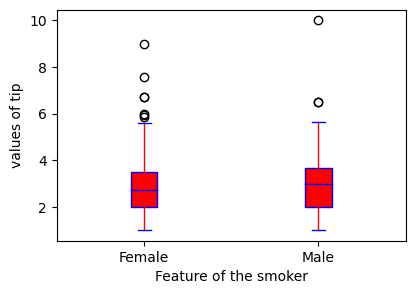

In [98]:
data_smoke = data.groupby("smoker")    #按照性别分成两组
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_smoke.get_group("No")["tip"], data_smoke.get_group("Yes")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the smoker")
ax.set_xticks([1,2], labels=["Female", "Male"])
ax.set_ylabel("values of tip")
plt.show()

/tmp/ipykernel_427253/2861699755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_smoke = data.groupby("day")    #按照日期分类


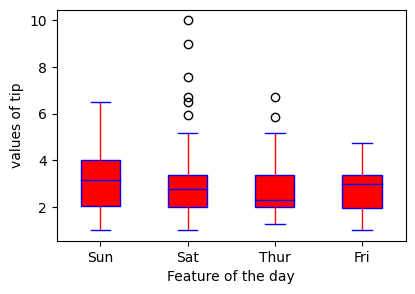

In [99]:
data_smoke = data.groupby("day")    #按照日期分类
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_smoke.get_group("Sun")["tip"], data_smoke.get_group("Sat")["tip"],data_smoke.get_group("Thur")["tip"], data_smoke.get_group("Fri")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the day")
ax.set_xticks([1,2,3,4], labels=["Sun", "Sat","Thur","Fri"])
ax.set_ylabel("values of tip")
plt.show()

/tmp/ipykernel_427253/4031935592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_smoke = data.groupby("time")    #按照时间分类


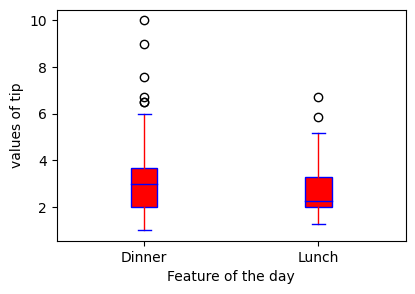

In [100]:
data_smoke = data.groupby("time")    #按照时间分类
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_smoke.get_group("Dinner")["tip"], data_smoke.get_group("Lunch")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the day")
ax.set_xticks([1,2], labels=["Dinner", "Lunch"])
ax.set_ylabel("values of tip")
plt.show()

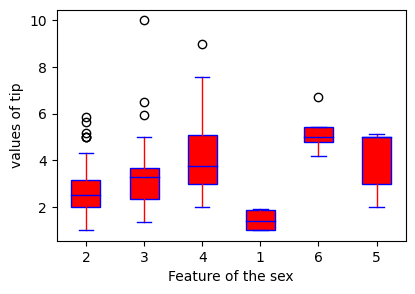

In [102]:
data_size = data.groupby("size")
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_size.get_group(2)["tip"], data_size.get_group(3)["tip"],
            data_size.get_group(4)["tip"], data_size.get_group(1)["tip"],
            data_size.get_group(6)["tip"], data_size.get_group(5)["tip"]], 
           patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the sex")
ax.set_xticks([x + 1 for x in range(6)], labels=['2','3','4','1','6','5'])
ax.set_ylabel("values of tip")
plt.show()

In [106]:
data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]

/tmp/ipykernel_427253/4190478650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]


sex
Male      3.113402
Female    2.773519
Name: tip, dtype: float64

/tmp/ipykernel_427253/3415098124.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  [data[["sex","smoker","tip"]].groupby("smoker").get_group("Yes").groupby("sex").mean("tip")["tip"],
/tmp/ipykernel_427253/3415098124.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]


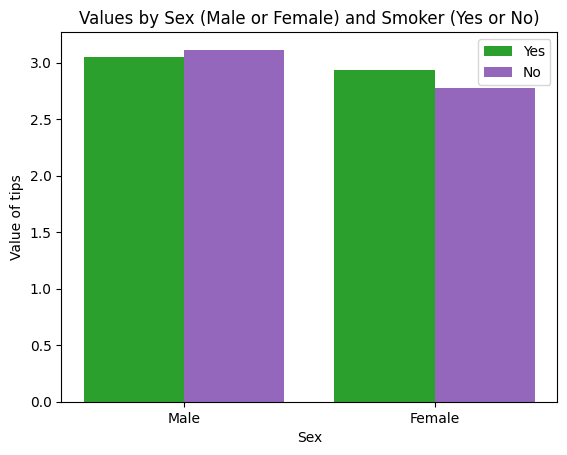

In [114]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, x_ticks, y_label, title):
    _, ax = plt.subplots()
    total_width = 0.8
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    for i in range(0, len(y_data_list)):
        ax.bar(x_data + alteration[i], y_data_list[i], color=colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data, x_ticks)
    ax.set_title(title)
    ax.legend(loc = 'best')

groupedbarplot([0, 1],
               [data[["sex","smoker","tip"]].groupby("smoker").get_group("Yes").groupby("sex").mean("tip")["tip"],
                data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]
                ],
               ["Yes", "No"],
               ["tab:green", "tab:purple"],
               "Sex", 
               ["Male", "Female"],
               "Value of tips",
               "Values by Sex (Male or Female) and Smoker (Yes or No)")

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [119]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Figure size 500x300 with 0 Axes>

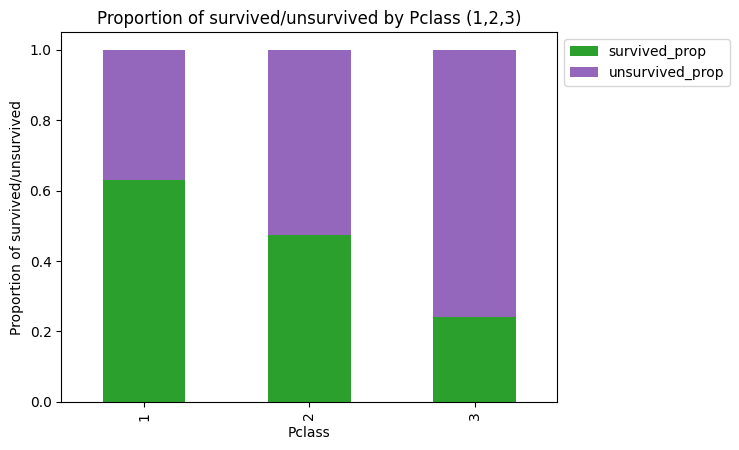

In [122]:
result = pd.DataFrame()
result['survived'] = data[data['survived'] == 1].groupby('pclass').size()
result['unsurvived'] = data[data['survived'] == 0].groupby('pclass').size()
result['total'] = result['survived'] + result['unsurvived']
result['survived_prop'] = result['survived'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
plt.figure(figsize=(5, 3))

result[['survived_prop', 'unsurvived_prop']].plot(kind='bar', stacked= True, color=['tab:green', 'tab:purple'])

plt.title('Proportion of survived/unsurvived by Pclass (1,2,3)')
plt.xlabel('Pclass')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<Figure size 500x300 with 0 Axes>

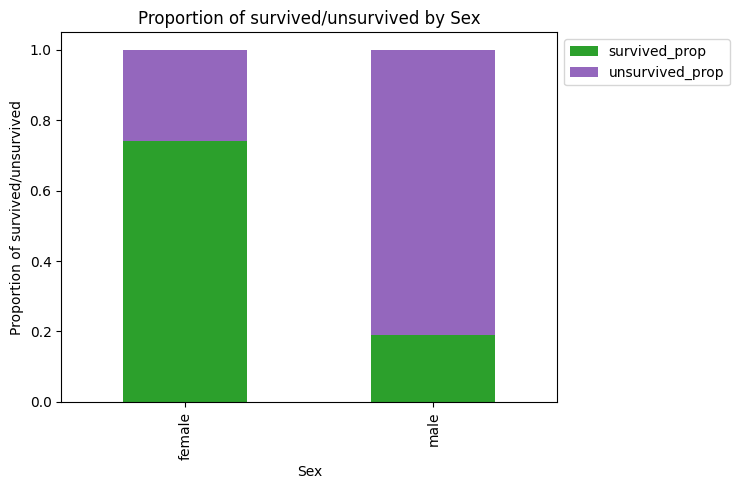

In [126]:
result = pd.DataFrame()
result['survived'] = data[data['survived'] == 1].groupby('sex').size()
result['unsurvived'] = data[data['survived'] == 0].groupby('sex').size()
result['total'] = result['survived'] + result['unsurvived']
result['survived_prop'] = result['survived'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
plt.figure(figsize=(5, 3))

result[['survived_prop', 'unsurvived_prop']].plot(kind='bar', stacked= True, color=['tab:green', 'tab:purple'])

plt.title('Proportion of survived/unsurvived by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived/unsurvived')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

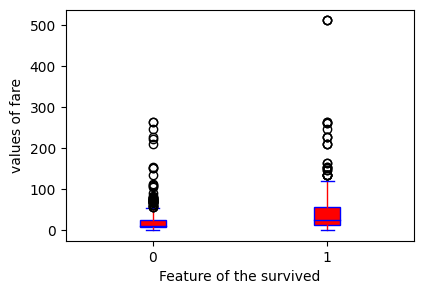

In [128]:
data_survived = data.groupby("survived")

fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_survived.get_group(0)["fare"], data_survived.get_group(1)["fare"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
ax.set_ylabel("values of fare")
plt.show()

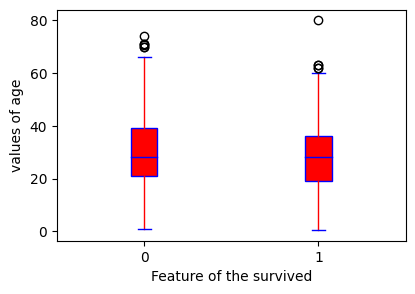

In [129]:
data_survived = data.groupby("survived")

fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_survived.get_group(0)["age"].dropna(), data_survived.get_group(1)["age"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
ax.set_ylabel("values of age")
plt.show()

<Figure size 450x300 with 0 Axes>

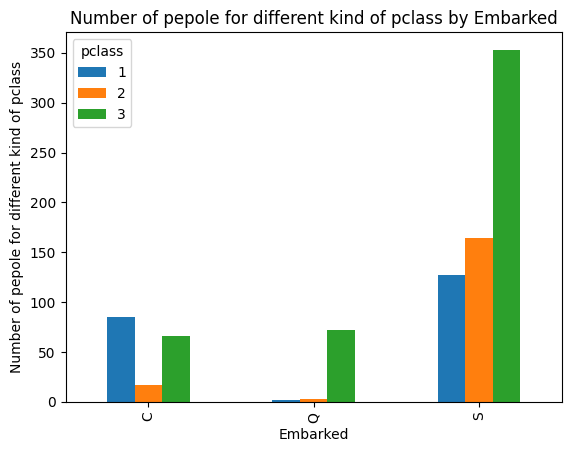

In [132]:
result = data.pivot_table(values='sex', index='embarked', columns='pclass', aggfunc='count')
plt.figure(figsize=(4.5, 3))
result.plot(kind='bar', stacked= False)
plt.title('Number of pepole for different kind of pclass by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of pepole for different kind of pclass')
plt.show()

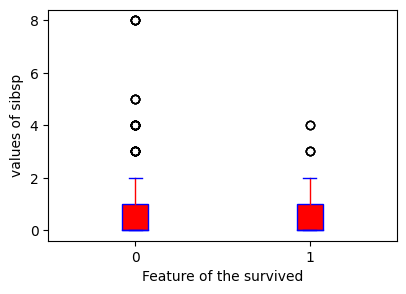

In [134]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_survived.get_group(0)["sibsp"].dropna(), data_survived.get_group(1)["sibsp"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
ax.set_ylabel("values of sibsp")
plt.show()

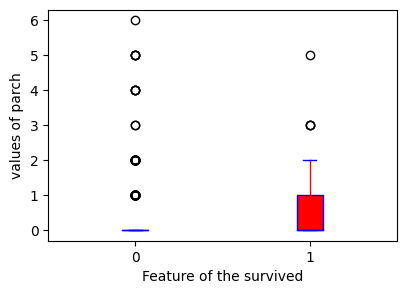

In [135]:
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot([data_survived.get_group(0)["parch"].dropna(), data_survived.get_group(1)["parch"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
ax.set_ylabel("values of parch")
plt.show()

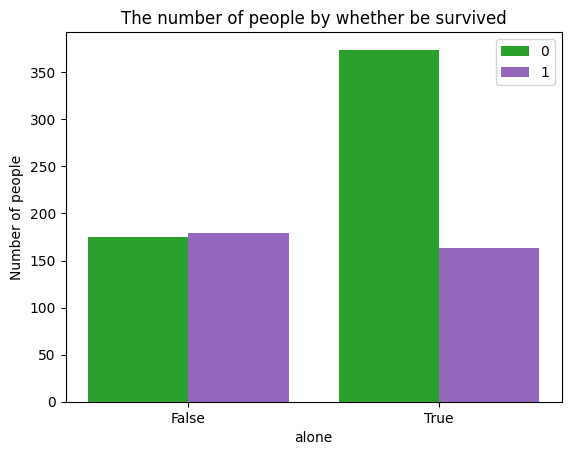

In [137]:
groupedbarplot([0, 1],
               [data.groupby("survived").get_group(0).groupby("alone").count()["alive"],
                data.groupby("survived").get_group(1).groupby("alone").count()["alive"]],
               ["0", "1"],
               ["tab:green", "tab:purple"],
               "alone", 
               ["False", "True"],
               "Number of people",
               "The number of people by whether be survived")